In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import numpy as np
import pandas as pd
np.random.seed(0)

In [26]:
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86877 entries, 0 to 86876
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           86877 non-null  object 
 1   Location       86877 non-null  object 
 2   MinTemp        85681 non-null  float64
 3   MaxTemp        85865 non-null  float64
 4   Rainfall       84535 non-null  float64
 5   Evaporation    47217 non-null  float64
 6   Sunshine       40297 non-null  float64
 7   WindGustDir    80596 non-null  object 
 8   WindGustSpeed  80604 non-null  float64
 9   WindDir9am     79092 non-null  object 
 10  WindDir3pm     83907 non-null  object 
 11  WindSpeed9am   85429 non-null  float64
 12  WindSpeed3pm   84810 non-null  float64
 13  Humidity9am    84811 non-null  float64
 14  Humidity3pm    84390 non-null  float64
 15  Pressure9am    76221 non-null  float64
 16  Pressure3pm    76268 non-null  float64
 17  Cloud9am       53399 non-null  float64
 18  Cloud3

<ipython-input-27-2255447aa243>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["RainTomorrow"], palette= cols)


<Axes: xlabel='RainTomorrow', ylabel='count'>

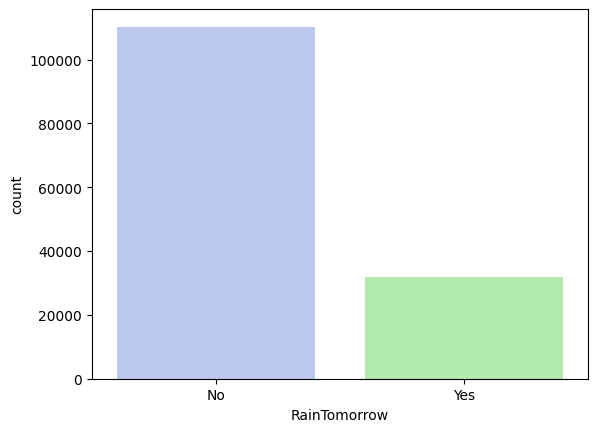

In [27]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#B2C4F3","#AAF4A5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

In [28]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [29]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [30]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

<ipython-input-30-c47c2d6da7f2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)


In [31]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [32]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [33]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)


<ipython-input-33-40565118487c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)


In [34]:
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day
features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

In [35]:
le_wg=LabelEncoder()
data['WindGustDir']=le_wg.fit_transform(data['WindGustDir'])

In [36]:
le_wd9=LabelEncoder()
data['WindDir9am']=le_wd9.fit_transform(data['WindDir9am'])

In [37]:
le_wd3=LabelEncoder()
data['WindDir3pm']=le_wd3.fit_transform(data['WindDir3pm'])

In [38]:
le_rt=LabelEncoder()
data['RainToday']=le_rt.fit_transform(data['RainToday'])

In [39]:
le_rto=LabelEncoder()
data['RainTomorrow']=le_rto.fit_transform(data['RainTomorrow'])

In [40]:
le_l=LabelEncoder()
data['Location']=le_l.fit_transform(data['Location'])

<Axes: >

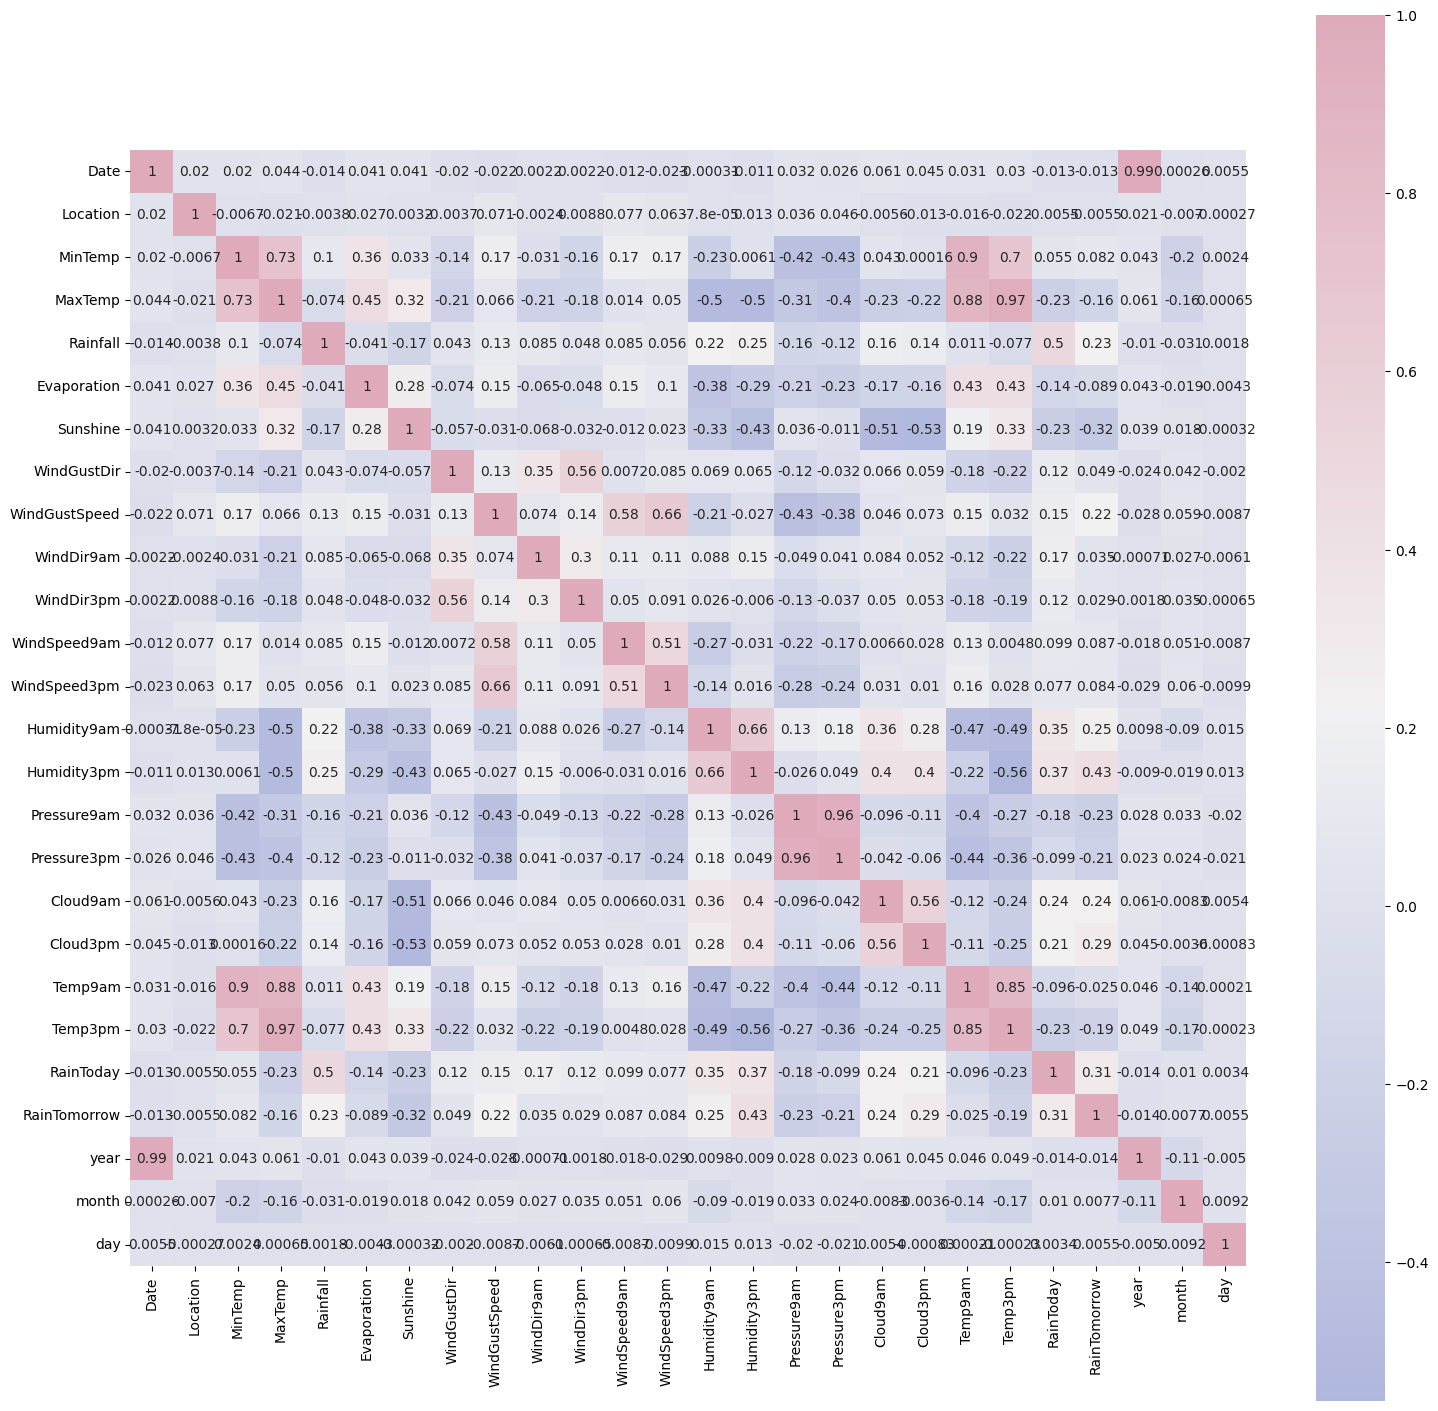

In [41]:
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [42]:
# function to encode datetime into cyclic parameters.
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature.

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [44]:
features=data

In [45]:
features.drop(columns=['Date'],inplace=True)

In [46]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(145460, 24)

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [48]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 23, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2910/2910 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7657 - loss: 0.6045 - val_accuracy: 0.7823 - val_loss: 0.5287
Epoch 2/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7809 - loss: 0.5466 - val_accuracy: 0.8325 - val_loss: 0.4145
Epoch 3/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8185 - loss: 0.4542 - val_accuracy: 0.8366 - val_loss: 0.3947
Epoch 4/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8271 - loss: 0.4389 - val_accuracy: 0.8360 - val_loss: 0.3895
Epoch 5/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8262 - loss: 0.4298 - val_accuracy: 0.8318 - val_loss: 0.3891
Epoch 6/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8285 - loss: 0.4225 - val_accuracy: 0.8370 - val_loss: 0.3863
Epoch 7/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8263 - loss: 0.4176 - val_accuracy: 0.8372 - val_loss: 0.3811
Epoch 8/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8282 - loss: 0.4135 - 

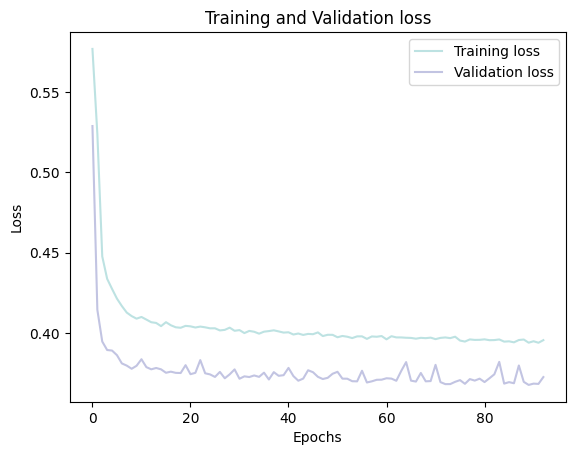

In [50]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

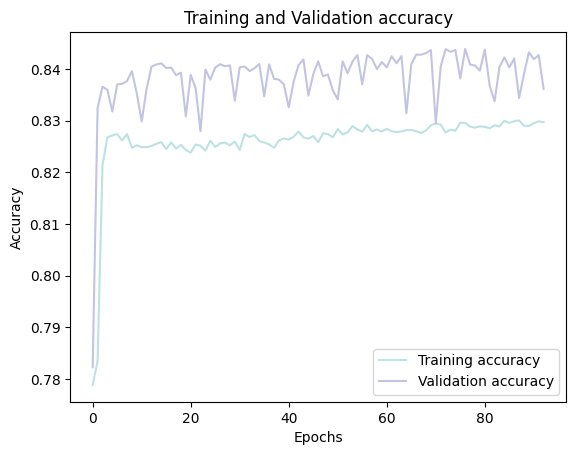

In [51]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


<Axes: >

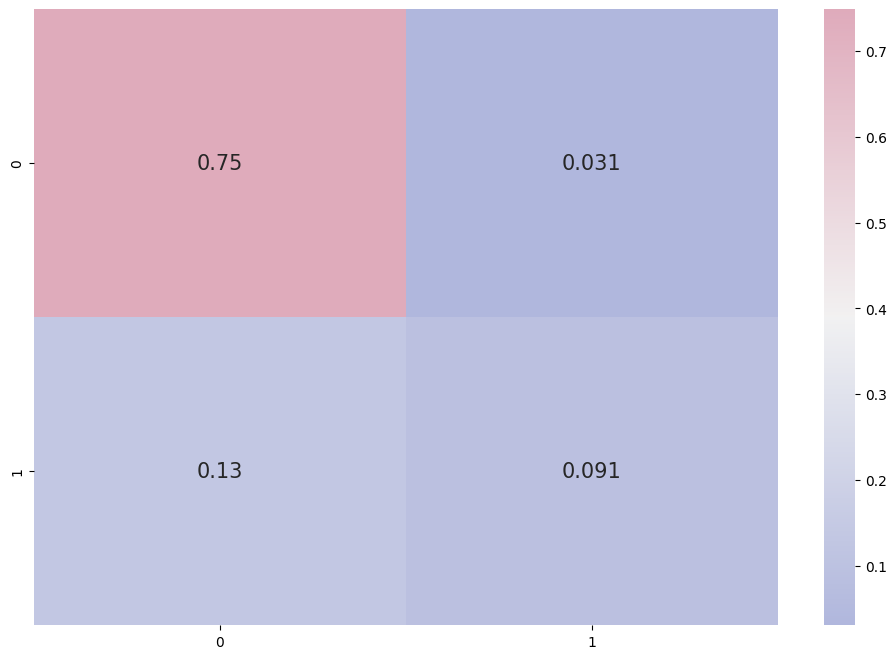

In [53]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22672
           1       0.75      0.41      0.53      6420

    accuracy                           0.84     29092
   macro avg       0.80      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



In [55]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29092 entries, 100721 to 80574
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       29092 non-null  int64  
 1   MinTemp        29092 non-null  float64
 2   MaxTemp        29092 non-null  float64
 3   Rainfall       29092 non-null  float64
 4   Evaporation    29092 non-null  float64
 5   Sunshine       29092 non-null  float64
 6   WindGustDir    29092 non-null  int64  
 7   WindGustSpeed  29092 non-null  float64
 8   WindDir9am     29092 non-null  int64  
 9   WindDir3pm     29092 non-null  int64  
 10  WindSpeed9am   29092 non-null  float64
 11  WindSpeed3pm   29092 non-null  float64
 12  Humidity9am    29092 non-null  float64
 13  Humidity3pm    29092 non-null  float64
 14  Pressure9am    29092 non-null  float64
 15  Pressure3pm    29092 non-null  float64
 16  Cloud9am       29092 non-null  float64
 17  Cloud3pm       29092 non-null  float64
 18  Temp9a

In [56]:
import pickle

In [57]:
model.save("model.keras")  # Save in TensorFlow format

In [59]:
encoders = {
    'WindGustDir': le_wg,
    'WindDir9am': le_wd9,
    'WindDir3pm':le_wd3,
    'RainToday':le_rt,
    'Location':le_l
}

with open('encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)